# Introduction to Computer Vision and Convolutional Neural Network

> It is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.


**Food_Vision(Link)** -> https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


**Dataset(Link)** -> https://www.kaggle.com/datasets/dansbecker/food-101


> However, we are only using two(pizza and steak) out of the 101 total labels from the food-101 dataset. We have achived using the *image_data_modification.ipynb* notebook.

**link** -> https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> We are starting small so that we can experiment and improve quickly and figure out which works and which doesn't work before scalling up.


## Getting the data

In [111]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip

zip_ref= zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-07-24 05:18:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.7’

pizza_steak.zip.7   100%[===================>] 104.47M   330MB/s    in 0.3s    

2022-07-24 05:18:28 (330 MB/s) - ‘pizza_steak.zip.7’ saved [109540975/109540975]



### Inspecting the data

In [112]:
!ls pizza_steak

test  train


In [113]:
!ls pizza_steak/train/

pizza  steak


In [114]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [115]:
import os

# Find the number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories, {len(filenames)} images in '{dirpath}'. ")

There are 2 directories, 0 images in 'pizza_steak'. 
There are 2 directories, 0 images in 'pizza_steak/train'. 
There are 0 directories, 750 images in 'pizza_steak/train/steak'. 
There are 0 directories, 750 images in 'pizza_steak/train/pizza'. 
There are 2 directories, 0 images in 'pizza_steak/test'. 
There are 0 directories, 250 images in 'pizza_steak/test/steak'. 
There are 0 directories, 250 images in 'pizza_steak/test/pizza'. 


In [116]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jul 24 03:05 .
drwxr-xr-x 1 root root 4096 Jul 24 05:18 ..
drwxr-xr-x 4 root root 4096 Jul 24 03:05 test
drwxr-xr-x 4 root root 4096 Jul 24 03:05 train


In [117]:
# Find the length of images in a file

len_steak_train_images=len(os.listdir("/content/pizza_steak/train/pizza"))
len_steak_train_images

750

## Visualizing the images

In [118]:
import pathlib
import numpy as np
data_dir=pathlib.Path("/content/pizza_steak/train")
# Creates a list of class_names from the sub-directory
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names), class_names

['pizza' 'steak']


(None, array(['pizza', 'steak'], dtype='<U5'))

In [119]:
import matplotlib.pyplot as plt
import matplotlib.image as mping
%matplotlib inline
import random

def view_random_image(target_dir,target_class):

  """
    target_dir and target_class are in string format.
  """

  # Target directory to view images
  target_folder= target_dir + target_class

  # Random Image path
  random_image= random.sample(os.listdir(target_folder),1)

  print(random_image)

  # Plotting and reading the images
  img= mping.imread(target_folder + "/"  + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # Shape of the image

  return img



['819547.jpg']
Image shape: (512, 512, 3)


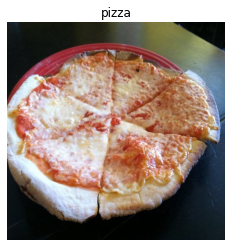

In [120]:
img=view_random_image(target_dir="/content/pizza_steak/train/", target_class="pizza")

In [121]:
img

array([[[22, 26, 27],
        [26, 30, 31],
        [29, 33, 36],
        ...,
        [ 1,  6,  2],
        [ 1,  6,  2],
        [ 1,  6,  2]],

       [[25, 29, 30],
        [25, 29, 30],
        [27, 31, 34],
        ...,
        [ 1,  6,  2],
        [ 1,  6,  2],
        [ 1,  6,  2]],

       [[26, 30, 31],
        [25, 29, 30],
        [24, 28, 31],
        ...,
        [ 1,  6,  2],
        [ 1,  6,  2],
        [ 2,  7,  3]],

       ...,

       [[ 7, 12, 16],
        [ 8, 13, 17],
        [ 8, 13, 17],
        ...,
        [18, 28, 30],
        [17, 27, 29],
        [17, 27, 29]],

       [[ 7, 12, 16],
        [ 8, 13, 17],
        [ 8, 13, 17],
        ...,
        [17, 27, 29],
        [16, 26, 28],
        [16, 26, 28]],

       [[ 7, 12, 16],
        [ 7, 12, 16],
        [ 8, 13, 17],
        ...,
        [16, 26, 28],
        [15, 25, 27],
        [15, 25, 27]]], dtype=uint8)

In [122]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[22, 26, 27],
        [26, 30, 31],
        [29, 33, 36],
        ...,
        [ 1,  6,  2],
        [ 1,  6,  2],
        [ 1,  6,  2]],

       [[25, 29, 30],
        [25, 29, 30],
        [27, 31, 34],
        ...,
        [ 1,  6,  2],
        [ 1,  6,  2],
        [ 1,  6,  2]],

       [[26, 30, 31],
        [25, 29, 30],
        [24, 28, 31],
        ...,
        [ 1,  6,  2],
        [ 1,  6,  2],
        [ 2,  7,  3]],

       ...,

       [[ 7, 12, 16],
        [ 8, 13, 17],
        [ 8, 13, 17],
        ...,
        [18, 28, 30],
        [17, 27, 29],
        [17, 27, 29]],

       [[ 7, 12, 16],
        [ 8, 13, 17],
        [ 8, 13, 17],
        ...,
        [17, 27, 29],
        [16, 26, 28],
        [16, 26, 28]],

       [[ 7, 12, 16],
        [ 7, 12, 16],
        [ 8, 13, 17],
        ...,
        [16, 26, 28],
        [15, 25, 27],
        [15, 25, 27]]], dtype=uint8)>

In [123]:
img.shape

(512, 512, 3)

In [124]:
(img/255.0)[:5]

array([[[0.08627451, 0.10196078, 0.10588235],
        [0.10196078, 0.11764706, 0.12156863],
        [0.11372549, 0.12941176, 0.14117647],
        ...,
        [0.00392157, 0.02352941, 0.00784314],
        [0.00392157, 0.02352941, 0.00784314],
        [0.00392157, 0.02352941, 0.00784314]],

       [[0.09803922, 0.11372549, 0.11764706],
        [0.09803922, 0.11372549, 0.11764706],
        [0.10588235, 0.12156863, 0.13333333],
        ...,
        [0.00392157, 0.02352941, 0.00784314],
        [0.00392157, 0.02352941, 0.00784314],
        [0.00392157, 0.02352941, 0.00784314]],

       [[0.10196078, 0.11764706, 0.12156863],
        [0.09803922, 0.11372549, 0.11764706],
        [0.09411765, 0.10980392, 0.12156863],
        ...,
        [0.00392157, 0.02352941, 0.00784314],
        [0.00392157, 0.02352941, 0.00784314],
        [0.00784314, 0.02745098, 0.01176471]],

       [[0.10196078, 0.10588235, 0.11372549],
        [0.09411765, 0.10980392, 0.11372549],
        [0.09411765, 0.10980392, 0.

## Build a CNN model

In [125]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [126]:
tf.random.set_seed(42)

# Preprocess the data
train_datagen= ImageDataGenerator(rescale=1./255)
valid_datagen= ImageDataGenerator(rescale=1./255)

# Paths to data directory

train_dir='/content/pizza_steak/train'
test_dir='/content/pizza_steak/test'

# Turning into batches
train_data= train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224,224), 
                                              class_mode="binary", 
                                              seed=42)


valid_data= valid_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224,224), 
                                              class_mode="binary", 
                                              seed=42)


# Build a CNN model

cnn_1= tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224,224,3)),
                tf.keras.layers.Conv2D(10, 3, activation="relu"),
                tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
                tf.keras.layers.Conv2D(10, 3, activation="relu",),
                tf.keras.layers.Conv2D(10, 3, activation="relu",),
                tf.keras.layers.MaxPool2D(2),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile Model

cnn_1.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

# Fit the model

history_1= cnn_1.fit(train_data, epochs=10, steps_per_epoch=len(train_data), validation_data= valid_data, validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 10s 196ms/step - loss: 0.5818 - accuracy: 0.6873 - val_loss: 0.4314 - val_accuracy: 0.8060
Epoch 2/10
47/47 [==============================] - 9s 193ms/step - loss: 0.4163 - accuracy: 0.8173 - val_loss: 0.3392 - val_accuracy: 0.8460
Epoch 3/10
47/47 [==============================] - 9s 191ms/step - loss: 0.4054 - accuracy: 0.8200 - val_loss: 0.3786 - val_accuracy: 0.8260
Epoch 4/10
47/47 [==============================] - 9s 192ms/step - loss: 0.3686 - accuracy: 0.8320 - val_loss: 0.3305 - val_accuracy: 0.8760
Epoch 5/10
47/47 [==============================] - 9s 192ms/step - loss: 0.3254 - accuracy: 0.8573 - val_loss: 0.3089 - val_accuracy: 0.8740
Epoch 6/10
47/47 [==============================] - 9s 191ms/step - loss: 0.2954 - accuracy: 0.8840 - val_loss: 0.3255 - val_accuracy: 0.8640
Epoch 7/10
47/47 [==============================] - 9s 189ms/ste

In [127]:
len(train_data)

47

In [128]:
1500/32 # So '47' are the number of batches we are using here.

46.875

In [129]:
cnn_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

## Building a non-cnn model

In [130]:
tf.random.set_seed(42)

model_2= tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(224,224,3)),
            tf.keras.layers.Dense(100, activation="relu"),
            tf.keras.layers.Dense(100, activation="relu"),
            tf.keras.layers.Dense(100, activation="relu"),
            tf.keras.layers.Dense(100, activation="relu"),
            tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_2.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

history_2= model_2.fit(train_data, epochs=10, steps_per_epoch=len(train_data), validation_data= valid_data, validation_steps=len(valid_data))

Epoch 1/10
47/47 [==============================] - 9s 182ms/step - loss: 2.5725 - accuracy: 0.6020 - val_loss: 0.4975 - val_accuracy: 0.7540
Epoch 2/10
47/47 [==============================] - 8s 177ms/step - loss: 0.6826 - accuracy: 0.7160 - val_loss: 1.4300 - val_accuracy: 0.5720
Epoch 3/10
47/47 [==============================] - 8s 177ms/step - loss: 0.8023 - accuracy: 0.7073 - val_loss: 0.5245 - val_accuracy: 0.7760
Epoch 4/10
47/47 [==============================] - 8s 176ms/step - loss: 0.5859 - accuracy: 0.7300 - val_loss: 0.4961 - val_accuracy: 0.7740
Epoch 5/10
47/47 [==============================] - 8s 177ms/step - loss: 0.6592 - accuracy: 0.7107 - val_loss: 0.4593 - val_accuracy: 0.7800
Epoch 6/10
47/47 [==============================] - 8s 177ms/step - loss: 0.4927 - accuracy: 0.7773 - val_loss: 0.6909 - val_accuracy: 0.6940
Epoch 7/10
47/47 [==============================] - 8s 176ms/step - loss: 0.6463 - accuracy: 0.7333 - val_loss: 0.5926 - val_accuracy: 0.6520
Epoch 

In [131]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 150528)            0         
                                                                 
 dense_12 (Dense)            (None, 100)               15052900  
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dense_16 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,083,301
Trainable params: 15,083,301


In [132]:
15083301/31000

486.55809677419353

In [133]:
cnn_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [134]:
cnn_1.evaluate(valid_data)

16/16 [==============================] - 2s 132ms/step - loss: 0.3681 - accuracy: 0.8620


[0.36808422207832336, 0.8619999885559082]

In [135]:
model_2.evaluate(valid_data)

16/16 [==============================] - 2s 128ms/step - loss: 0.4890 - accuracy: 0.7560


[0.4890393912792206, 0.7559999823570251]

## Conclusion

> This is the power of *CNN* even though it had 30K+ trainable params, and the *non CNN* model which had over 15M+ trainable params, which is almost *500 times* more than that of the *CNN* model. The accuracy was no way close to that of the *CNN* model.

>The evaluation of the *CNN* model was *0.846* or *84.6%* accurate

>The evaluation of the *non CNN* model was *0.772* or *77.2%* accurate

## Binary Classification

### Visualize the data

['2556273.jpg']
Image shape: (512, 512, 3)
['401144.jpg']
Image shape: (512, 306, 3)


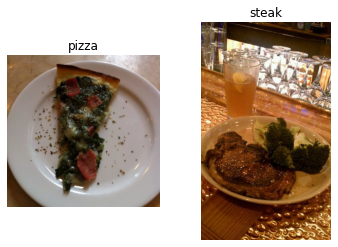

In [136]:
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("/content/pizza_steak/train/", "pizza")
plt.subplot(1,2,2)
steak_img=view_random_image("/content/pizza_steak/train/", "steak")

### Preprocess the data

In [137]:
train_dir, test_dir

('/content/pizza_steak/train', '/content/pizza_steak/test')

In [138]:
!nvidia-smi

Sun Jul 24 05:21:32 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    30W /  70W |   2348MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [139]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale=1/255.)

In [140]:
train_data= train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224,224), 
                                              class_mode="binary", 
                                              seed=42)

Found 1500 images belonging to 2 classes.


In [141]:
test_data= test_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224,224), 
                                              class_mode="binary", 
                                              seed=42)

Found 500 images belonging to 2 classes.


In [142]:
images, labels= train_data.next() # Get the 'next' batches of images/labels in the train_data

len(images), len(labels)

(32, 32)

In [143]:
images[:1], images.shape, images[1].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.31764707, 0.3254902 , 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34901962, 0.37254903],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.37647063],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.37254903, 0.39607847, 0.29411766],
          [0.39607847, 0.41960788, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.3019608 ],
          [0.30980393, 0.29803923, 0.27058825],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [144]:
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

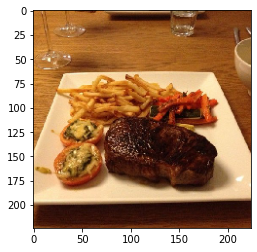

In [145]:
plt.imshow(images[5])

## Building a CNN baseline model

> Baseline model is a model which we build with general/default parameters and try to tweak the parameters to get better results than the baseline model.

> In deep learning, there is almost an infinite amount of architectures we could create. So one of the best ways to get started is to start with something simple and see if it works on the data and then introduce complexity as required(e.g look at which current model is performing best in the filed of the problem we are currently working.


In [146]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [147]:
model_3= Sequential([
            Conv2D(filters=10, kernel_size=3, strides=1, padding="valid",activation="relu", input_shape=(224,224,3)), # Input Layer
            Conv2D(10,3, activation="relu"),
            Conv2D(10,3, activation="relu"),
            Flatten(),
            Dense(1, activation="sigmoid") # Output layer, 1 output as it is a binary classification
])

In [148]:
model_3.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=['accuracy'])

In [149]:
model_3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_25 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_26 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_9 (Flatten)         (None, 475240)            0         
                                                                 
 dense_17 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [150]:
history_3=model_3.fit(train_data, epochs=20, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/20
47/47 [==============================] - 10s 198ms/step - loss: 1.0662 - accuracy: 0.6713 - val_loss: 0.4452 - val_accuracy: 0.7920
Epoch 2/20
47/47 [==============================] - 9s 192ms/step - loss: 0.4348 - accuracy: 0.8067 - val_loss: 0.3806 - val_accuracy: 0.8420
Epoch 3/20
47/47 [==============================] - 9s 192ms/step - loss: 0.3690 - accuracy: 0.8560 - val_loss: 0.3632 - val_accuracy: 0.8320
Epoch 4/20
47/47 [==============================] - 9s 191ms/step - loss: 0.2454 - accuracy: 0.9160 - val_loss: 0.3716 - val_accuracy: 0.8320
Epoch 5/20
47/47 [==============================] - 9s 191ms/step - loss: 0.1128 - accuracy: 0.9707 - val_loss: 0.4626 - val_accuracy: 0.8120
Epoch 6/20
47/47 [==============================] - 9s 191ms/step - loss: 0.0528 - accuracy: 0.9887 - val_loss: 0.6001 - val_accuracy: 0.7800
Epoch 7/20
47/47 [==============================] - 9s 190ms/step - loss: 0.0333 - accuracy: 0.9920 - val_loss: 0.5554 - val_accuracy: 0.8180
Epoch

In [151]:
model_3.evaluate(test_data)

16/16 [==============================] - 2s 134ms/step - loss: 0.7967 - accuracy: 0.8380


[0.7966544032096863, 0.8379999995231628]

In [152]:
model_2.evaluate(test_data)

16/16 [==============================] - 2s 129ms/step - loss: 0.4890 - accuracy: 0.7560


[0.48903948068618774, 0.7559999823570251]

In [153]:
cnn_1.evaluate(test_data)

16/16 [==============================] - 2s 135ms/step - loss: 0.3681 - accuracy: 0.8620


[0.36808422207832336, 0.8619999885559082]

## Evaluating the model

In [154]:
import pandas as pd

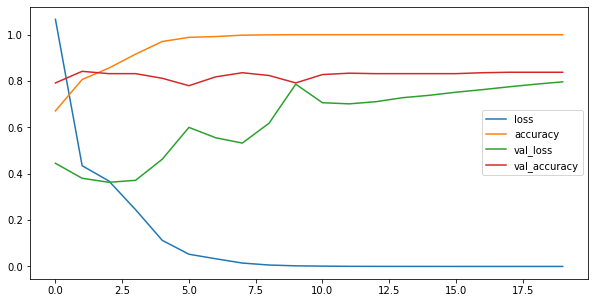

In [155]:
pd.DataFrame(history_3.history).plot(figsize=(10,5))

> When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training datset too well and this the model's ability to generalize to unseen data will be diminished.

### Adjusting model parameters

* Create a baseline
* Beat the baseline by overfitting the larger model
* Reduce overfitting

#### Induce overfitting

* Increase the number of Conv layers
* Increase the number of Conv filters
* Add another dense layer to the output of the flattened layer

#### Reduce Overfitting

* Add data augmentation
* Add regularization layers(add MaxPool2D layer)
* Add more data..

> Regularization is the process of reducing overfitting in a model.

In [156]:
model_4= Sequential([
            Conv2D(10,3, activation="relu", input_shape=(224,224,3)),
            MaxPool2D(pool_size=2),
            Conv2D(10,3, activation="relu"),
            MaxPool2D(),
            Conv2D(10,3, activation="relu"),
            MaxPool2D(),
            Flatten(),
            Dense(1, activation="sigmoid")
])

model_4.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=['accuracy'])

history_4=model_4.fit(train_data, epochs=20, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/20
47/47 [==============================] - 9s 189ms/step - loss: 0.6060 - accuracy: 0.6453 - val_loss: 0.4529 - val_accuracy: 0.7960
Epoch 2/20
47/47 [==============================] - 9s 185ms/step - loss: 0.4476 - accuracy: 0.7947 - val_loss: 0.3900 - val_accuracy: 0.8140
Epoch 3/20
47/47 [==============================] - 9s 186ms/step - loss: 0.4179 - accuracy: 0.8140 - val_loss: 0.3409 - val_accuracy: 0.8680
Epoch 4/20
47/47 [==============================] - 9s 186ms/step - loss: 0.3884 - accuracy: 0.8260 - val_loss: 0.3543 - val_accuracy: 0.8380
Epoch 5/20
47/47 [==============================] - 9s 185ms/step - loss: 0.3789 - accuracy: 0.8347 - val_loss: 0.3158 - val_accuracy: 0.8700
Epoch 6/20
47/47 [==============================] - 9s 184ms/step - loss: 0.3605 - accuracy: 0.8420 - val_loss: 0.3356 - val_accuracy: 0.8480
Epoch 7/20
47/47 [==============================] - 9s 186ms/step - loss: 0.3700 - accuracy: 0.8347 - val_loss: 0.3206 - val_accuracy: 0.8640
Epoch 

In [157]:
model_4.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 26, 26, 10)     

In [158]:
model_4.evaluate(test_data)

16/16 [==============================] - 2s 131ms/step - loss: 0.2977 - accuracy: 0.8740


[0.2976861000061035, 0.8740000128746033]

In [159]:
model_3.evaluate(test_data)

16/16 [==============================] - 2s 135ms/step - loss: 0.7967 - accuracy: 0.8380


[0.7966544032096863, 0.8379999995231628]

In [160]:
model_3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_25 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_26 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_9 (Flatten)         (None, 475240)            0         
                                                                 
 dense_17 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


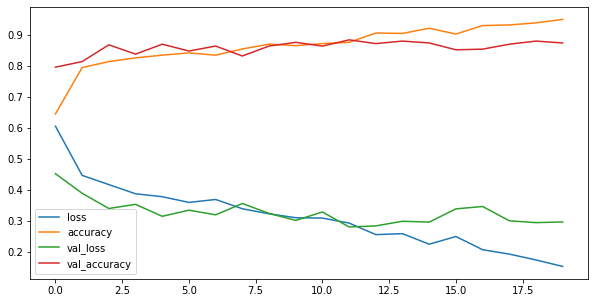

In [161]:
pd.DataFrame(history_4.history).plot(figsize=(10,5))

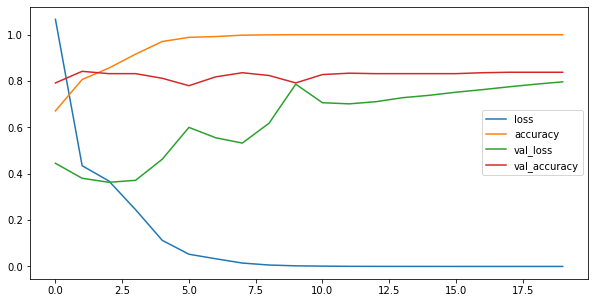

In [162]:
pd.DataFrame(history_3.history).plot(figsize=(10,5))

## Data Augmentation

> Data Augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn mode generalizable patterns. Altering  might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

> Data Augmentation is usually only performed on the training data. Using *ImageDataGenerator* build-in data augmentation parameters. The images are left as they are in the directories but are modified as they're loaded into the model.

In [163]:
train_datagen_augmented= ImageDataGenerator(rescale=1/255., rotation_range=0.2, shear_range=0.2, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.3, horizontal_flip=True)
train_datagen= ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale=1/255.)

### Converting to augmented data



In [164]:
# Augmented Data
print("Augmented Data")
train_data_augmented= train_datagen_augmented.flow_from_directory(train_dir, batch_size=32, shuffle=False, class_mode="binary", target_size=(224,224))

# Non-Augmented Train Data
print("Non Augmented Train Data")
train_data= train_datagen.flow_from_directory(train_dir, batch_size=32, shuffle=False, class_mode="binary", target_size=(224,224))

# Non-Augmented Test Data
print("Non Augmented Test Data")
test_data= test_datagen.flow_from_directory(test_dir, batch_size=32, shuffle=True, class_mode="binary", target_size=(224,224))

Augmented Data
Found 1500 images belonging to 2 classes.
Non Augmented Train Data
Found 1500 images belonging to 2 classes.
Non Augmented Test Data
Found 1500 images belonging to 2 classes.


In [165]:
images, labels= train_data.next()
augmented_images, augmented_labels=train_data_augmented.next()

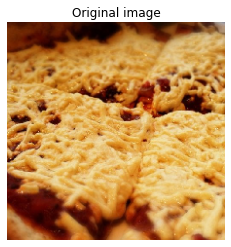

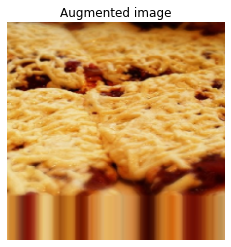

In [166]:
# import random
# random_number = random.randint(0,32)
# print(f"Showing Image Number: {random_number}")
# plt.imshow(images[random_number])
# plt.title(f"Original Image")
# plt.axis(False)
# plt.figure()

# plt.imshow(augmented_images[random_number])
# plt.title(f" Augmented Image")
# plt.axis(False);


# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);



## Training model with augmented data

In [167]:
model_5=Sequential([
          Conv2D(10,3, activation="relu", input_shape=(224,224,3)),
          MaxPool2D(2),
          Conv2D(10,3, activation="relu"),
          MaxPool2D(2),
          Conv2D(10,3, activation="relu"),
          MaxPool2D(2),
          Flatten(),
          Dense(1, activation="sigmoid")
])


model_5.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=['accuracy'])

history_5=model_5.fit(train_data_augmented, epochs=5, steps_per_epoch=len(train_data_augmented), validation_data=test_data, validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 26s 554ms/step - loss: 0.7267 - accuracy: 0.5687 - val_loss: 0.7028 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 26s 549ms/step - loss: 0.7049 - accuracy: 0.4280 - val_loss: 0.6829 - val_accuracy: 0.6020
Epoch 3/5
47/47 [==============================] - 26s 546ms/step - loss: 0.6847 - accuracy: 0.5573 - val_loss: 0.6531 - val_accuracy: 0.6187
Epoch 4/5
47/47 [==============================] - 26s 550ms/step - loss: 0.6824 - accuracy: 0.5760 - val_loss: 0.6251 - val_accuracy: 0.7433
Epoch 5/5
47/47 [==============================] - 26s 549ms/step - loss: 0.6255 - accuracy: 0.6440 - val_loss: 0.6214 - val_accuracy: 0.6140


In [168]:
model_5.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 26, 26, 10)     

In [169]:
model_5.evaluate(test_data)

47/47 [==============================] - 6s 133ms/step - loss: 0.6214 - accuracy: 0.6140


[0.62139493227005, 0.6140000224113464]

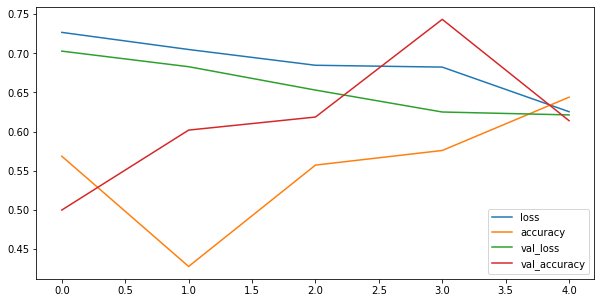

In [170]:
import pandas as pd
pd.DataFrame(history_5.history).plot(figsize=(10,5))

#### Augmented Data with Shuffled Turned *On*

> When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images(in this case, pizza and steak at the same time instead of just pizza then steak.

In [171]:
# Augmented Data
print("Augmented Data")
train_data_augmented_shuffled= train_datagen_augmented.flow_from_directory(train_dir, batch_size=32, shuffle=True, class_mode="binary", target_size=(224,224))

# Non-Augmented Train Data
print("Non Augmented Train Data")
train_data_shuffled= train_datagen.flow_from_directory(train_dir, batch_size=32, shuffle=True, class_mode="binary", target_size=(224,224))

# Non-Augmented Test Data
print("Non Augmented Test Data")
test_data_shuffled= test_datagen.flow_from_directory(test_dir, batch_size=32, shuffle=True, class_mode="binary", target_size=(224,224))

Augmented Data
Found 1500 images belonging to 2 classes.
Non Augmented Train Data
Found 1500 images belonging to 2 classes.
Non Augmented Test Data
Found 1500 images belonging to 2 classes.


In [172]:
model_6= Sequential([
          Conv2D(10,3, activation="relu", input_shape=(224,224,3)),
          MaxPool2D(2),
          Conv2D(10,3, activation="relu"),
          MaxPool2D(2),
          Conv2D(10,3, activation="relu"),
          MaxPool2D(2),
          Flatten(),
          Dense(1, activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=['accuracy'])

history_6=model_6.fit(train_data_augmented_shuffled, epochs=5, steps_per_epoch=len(train_data_augmented_shuffled), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 550ms/step - loss: 0.6665 - accuracy: 0.5993 - val_loss: 0.5975 - val_accuracy: 0.6727
Epoch 2/5
47/47 [==============================] - 26s 548ms/step - loss: 0.6150 - accuracy: 0.6547 - val_loss: 0.5373 - val_accuracy: 0.7707
Epoch 3/5
47/47 [==============================] - 25s 542ms/step - loss: 0.5744 - accuracy: 0.7020 - val_loss: 0.4743 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 25s 541ms/step - loss: 0.5244 - accuracy: 0.7433 - val_loss: 0.4745 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 26s 546ms/step - loss: 0.4969 - accuracy: 0.7633 - val_loss: 0.4001 - val_accuracy: 0.8300


In [173]:
model_6.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 26, 26, 10)     

In [174]:
model_6.evaluate(test_data)

47/47 [==============================] - 6s 133ms/step - loss: 0.4001 - accuracy: 0.8300


[0.40008601546287537, 0.8299999833106995]

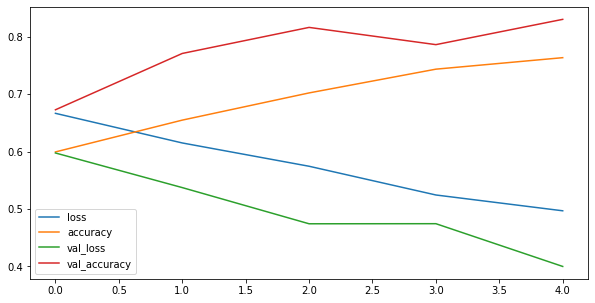

In [175]:
pd.DataFrame(history_6.history).plot(figsize=(10,5))

### Try to improve the model even more

* Increase the number of model layers(Add more Conv2D or MaxPool2D layers)
* Increase the number of filters in each convolutional layer
* Train for longer
* Find an ideal learning rate
* Get more data
* Use **transfer learning** to leverage what another image model has learn and adjust it for our use case.

## Importing Custom Data

> When we train a neural network and we want to make a prediction with it on the custom data, it's important that the custom data is preprocessed into the same format as the data the model was trained on.

In [176]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2022-07-24 05:32:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.3’

03-steak.jpeg.3     100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2022-07-24 05:32:51 (145 MB/s) - ‘03-steak.jpeg.3’ saved [1978213/1978213]



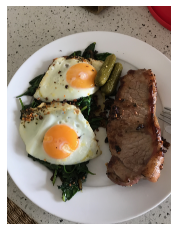

In [177]:
steak=mping.imread("/content/03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [178]:
steak.shape

(4032, 3024, 3)

In [179]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

In [180]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img


In [181]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [182]:
steak.shape

TensorShape([224, 224, 3])

In [183]:
custom_pred=model_6.predict(tf.expand_dims(steak, axis=0))
custom_pred

array([[0.8021728]], dtype=float32)

In [184]:
 class_names

array(['pizza', 'steak'], dtype='<U5')

In [185]:
pred_class=class_names[int(tf.round(custom_pred))]
pred_class

'steak'

In [186]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

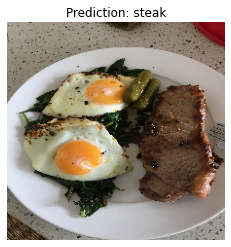

In [187]:
pred_and_plot(model_6, "03-steak.jpeg", class_names)


In [188]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2022-07-24 05:32:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.3’

03-pizza-dad.jpeg.3 100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2022-07-24 05:32:54 (151 MB/s) - ‘03-pizza-dad.jpeg.3’ saved [2874848/2874848]



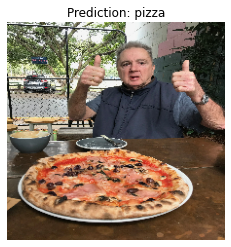

In [189]:
pred_and_plot(model_6, '03-pizza-dad.jpeg')

# Multi-Class Classification Problem

* Visualize the data
* Preprocess the data
* Create a model(Baseline model)
* Fit the mdoel
* Evaluate the model
* Tweak and improve the baseline model

## Importing the data

In [190]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref= zipfile.ZipFile("/content/10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-07-24 05:32:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.2’

10_food_classes_all 100%[===================>] 495.13M  88.8MB/s    in 4.1s    

2022-07-24 05:32:58 (120 MB/s) - ‘10_food_classes_all_data.zip.2’ saved [519183241/519183241]



In [191]:
import os

# Find the number of files

for dirpath, dirnames, filenames in os.walk("/content/10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories, {len(filenames)} images in '{dirpath}'. ")

There are 2 directories, 0 images in '/content/10_food_classes_all_data'. 
There are 10 directories, 0 images in '/content/10_food_classes_all_data/train'. 
There are 0 directories, 750 images in '/content/10_food_classes_all_data/train/ice_cream'. 
There are 0 directories, 750 images in '/content/10_food_classes_all_data/train/sushi'. 
There are 0 directories, 750 images in '/content/10_food_classes_all_data/train/hamburger'. 
There are 0 directories, 750 images in '/content/10_food_classes_all_data/train/ramen'. 
There are 0 directories, 750 images in '/content/10_food_classes_all_data/train/chicken_curry'. 
There are 0 directories, 750 images in '/content/10_food_classes_all_data/train/steak'. 
There are 0 directories, 750 images in '/content/10_food_classes_all_data/train/pizza'. 
There are 0 directories, 750 images in '/content/10_food_classes_all_data/train/chicken_wings'. 
There are 0 directories, 750 images in '/content/10_food_classes_all_data/train/fried_rice'. 
There are 0 d

## Visualize the data

In [192]:
import pathlib
import numpy as np
data_dir=pathlib.Path("/content/10_food_classes_all_data/train")
# Creates a list of class_names from the sub-directory
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [193]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [194]:
len(class_names)

10

In [195]:
train_dir="10_food_classes_all_data/train/"
test_dir='10_food_classes_all_data/test/'

In [196]:
train_dir, test_dir

('10_food_classes_all_data/train/', '10_food_classes_all_data/test/')

In [196]:
img=view_random_image(target_dir="/content/10_food_classes_all_data/train/", target_class="ice_cream")

['100332.jpg']
Image shape: (512, 384, 3)


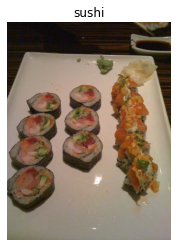

In [218]:
import random
img=view_random_image(target_dir=train_dir, target_class=random.choice(class_names))

In [211]:
import glob
import cv2
import os

In [212]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [213]:
train_dir

'10_food_classes_all_data/train/'

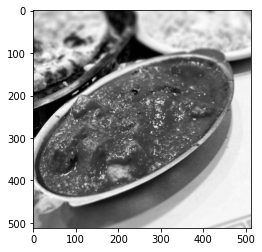

In [215]:
for name in class_names:
  path= os.path.join(train_dir, name) # path to directory
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break

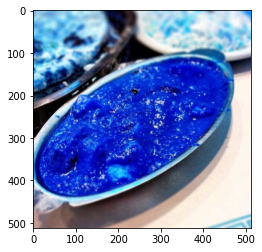

In [217]:
for name in class_names:
  path= os.path.join(train_dir, name) # path to directory
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img))
    plt.imshow(img_array)
    plt.show()
    break
  break

### Preprocess the data

In [225]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen= ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale=1/255.)


train_data= train_datagen.flow_from_directory(train_dir, batch_size=32, shuffle=True, class_mode="categorical", target_size=(224,224))

test_data= test_datagen.flow_from_directory(test_dir, batch_size=32, shuffle=True, class_mode="categorical", target_size=(224,224))


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [226]:
model_7= Sequential([
           Conv2D(10,3, activation="relu", input_shape=(224,224,3)),
           MaxPool2D(2),
           Conv2D(10,3, activation="relu",),
           MaxPool2D(2),
           Conv2D(10,3, activation="relu",),
           MaxPool2D(2),
           Flatten(),
           Dense(10, activation="softmax")
])

model_7.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

history_7=model_7.fit(train_data, epochs=20, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/20
235/235 [==============================] - 43s 183ms/step - loss: 2.1586 - accuracy: 0.2056 - val_loss: 1.9824 - val_accuracy: 0.3008
Epoch 2/20
235/235 [==============================] - 43s 183ms/step - loss: 1.8944 - accuracy: 0.3408 - val_loss: 1.9077 - val_accuracy: 0.3196
Epoch 3/20
235/235 [==============================] - 43s 183ms/step - loss: 1.7656 - accuracy: 0.3957 - val_loss: 1.7831 - val_accuracy: 0.3772
Epoch 4/20
235/235 [==============================] - 43s 184ms/step - loss: 1.6251 - accuracy: 0.4592 - val_loss: 1.8164 - val_accuracy: 0.3804
Epoch 5/20
235/235 [==============================] - 43s 183ms/step - loss: 1.4672 - accuracy: 0.5076 - val_loss: 1.8373 - val_accuracy: 0.3828
Epoch 6/20
235/235 [==============================] - 43s 182ms/step - loss: 1.2942 - accuracy: 0.5681 - val_loss: 1.9282 - val_accuracy: 0.3788
Epoch 7/20
235/235 [==============================] - 43s 182ms/step - loss: 1.1132 - accuracy: 0.6285 - val_loss: 2.0913 - val_ac

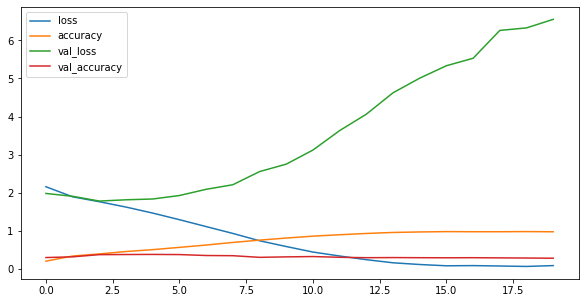

In [229]:
pd.DataFrame(history_7.history).plot(figsize=(10,5))

In [244]:
model_7.evaluate(test_data)

79/79 [==============================] - 10s 129ms/step - loss: 6.5507 - accuracy: 0.2832


[6.550654411315918, 0.2831999957561493]

> This model *model_8* is similar to the model in the CNN explainer website.

Link -> https://poloclub.github.io/cnn-explainer/

In [227]:
model_8= Sequential([
           Conv2D(10,3, activation="relu", input_shape=(224,224,3)),
           Conv2D(10,3, activation="relu",),
           MaxPool2D(2),
           Conv2D(10,3, activation="relu",),
           Conv2D(10,3, activation="relu",),
           MaxPool2D(2),
           Conv2D(10,3, activation="relu",),
           Conv2D(10,3, activation="relu",),
           MaxPool2D(2),
           Flatten(),
           Dense(10, activation="softmax")
])

model_8.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

history_8=model_8.fit(train_data, epochs=10, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 46s 192ms/step - loss: 2.2119 - accuracy: 0.1703 - val_loss: 2.0379 - val_accuracy: 0.2576
Epoch 2/10
235/235 [==============================] - 56s 236ms/step - loss: 1.9614 - accuracy: 0.3069 - val_loss: 1.9652 - val_accuracy: 0.3176
Epoch 3/10
235/235 [==============================] - 45s 191ms/step - loss: 1.7778 - accuracy: 0.3925 - val_loss: 1.8368 - val_accuracy: 0.3816
Epoch 4/10
235/235 [==============================] - 45s 191ms/step - loss: 1.6036 - accuracy: 0.4565 - val_loss: 1.9248 - val_accuracy: 0.3456
Epoch 5/10
235/235 [==============================] - 45s 191ms/step - loss: 1.3925 - accuracy: 0.5291 - val_loss: 2.0814 - val_accuracy: 0.3348
Epoch 6/10
235/235 [==============================] - 45s 190ms/step - loss: 1.1927 - accuracy: 0.6047 - val_loss: 2.0830 - val_accuracy: 0.3480
Epoch 7/10
235/235 [==============================] - 45s 191ms/step - loss: 0.9678 - accuracy: 0.6735 - val_loss: 2.4041 - val_ac

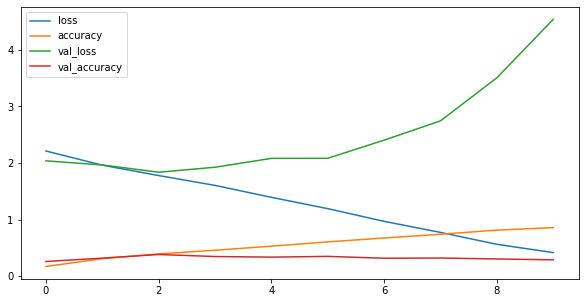

In [228]:
pd.DataFrame(history_8.history).plot(figsize=(10,5))

In [230]:
model_8.evaluate(test_data)

79/79 [==============================] - 11s 136ms/step - loss: 4.5402 - accuracy: 0.2872


[4.540241718292236, 0.287200003862381]

#### Conclusion

> From the *model_7 and model_8* it is clear that the models are **overfitting** on the train_data and not able to generalize on the test_data properly.

## Adjusting the hyper-parameter to reduce overfitting



### Data Augmentation

In [232]:
train_datagen_augmented= ImageDataGenerator(rescale=1/255., rotation_range=0.2, shear_range=0.2, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.3, horizontal_flip=True)
test_datagen= ImageDataGenerator(rescale=1/255.)


train_data_augmented= train_datagen_augmented.flow_from_directory(train_dir, batch_size=32, shuffle=True, class_mode="categorical", target_size=(224,224))

test_data= test_datagen.flow_from_directory(test_dir, batch_size=32, shuffle=True, class_mode="categorical", target_size=(224,224))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [233]:
model_9= Sequential([
           Conv2D(10,3, activation="relu", input_shape=(224,224,3)),
           Conv2D(10,3, activation="relu",),
           MaxPool2D(2),
           Conv2D(10,3, activation="relu",),
           Conv2D(10,3, activation="relu",),
           MaxPool2D(2),
           Conv2D(10,3, activation="relu",),
           Conv2D(10,3, activation="relu",),
           MaxPool2D(2),
           Flatten(),
           Dense(10, activation="softmax")
])

model_9.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

history_9=model_9.fit(train_data_augmented, epochs=10, steps_per_epoch=len(train_data_augmented), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 112s 473ms/step - loss: 2.2497 - accuracy: 0.1552 - val_loss: 2.1517 - val_accuracy: 0.2160
Epoch 2/10
235/235 [==============================] - 111s 473ms/step - loss: 2.1667 - accuracy: 0.2052 - val_loss: 2.0162 - val_accuracy: 0.2876
Epoch 3/10
235/235 [==============================] - 111s 472ms/step - loss: 2.1009 - accuracy: 0.2449 - val_loss: 1.9580 - val_accuracy: 0.3016
Epoch 4/10
235/235 [==============================] - 110s 470ms/step - loss: 2.0485 - accuracy: 0.2759 - val_loss: 1.8848 - val_accuracy: 0.3584
Epoch 5/10
235/235 [==============================] - 111s 471ms/step - loss: 2.0203 - accuracy: 0.2847 - val_loss: 1.8224 - val_accuracy: 0.3496
Epoch 6/10
235/235 [==============================] - 111s 471ms/step - loss: 1.9803 - accuracy: 0.3112 - val_loss: 1.8125 - val_accuracy: 0.3592
Epoch 7/10
235/235 [==============================] - 111s 472ms/step - loss: 1.9575 - accuracy: 0.3157 - val_loss: 1.8663 -

In [234]:
model_9.evaluate(test_data)

79/79 [==============================] - 11s 133ms/step - loss: 1.7159 - accuracy: 0.4028


[1.7159123420715332, 0.4027999937534332]

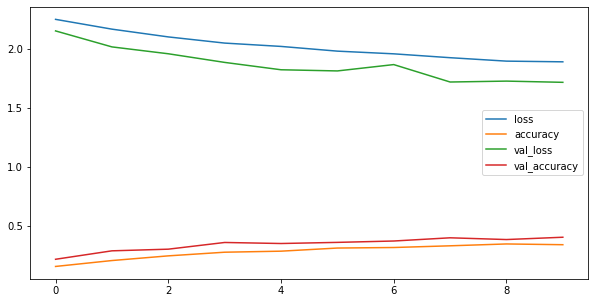

In [235]:
pd.DataFrame(history_9.history).plot(figsize=(10,5))

In [236]:
model_9.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_58 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_60 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

In [237]:
model_8.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_52 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_54 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

In [238]:
model_7.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 26, 26, 10)     

### Cloning the structure of a trained model

> This does not clone the previously trained patterns or features from the model but just clones the architecture of the model.

In [243]:
model_10=tf.keras.models.clone_model(model_9)

model_10.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

history_10=model_10.fit(train_data_augmented, epochs=10, steps_per_epoch=len(train_data_augmented), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 111s 469ms/step - loss: 2.2451 - accuracy: 0.1467 - val_loss: 2.1390 - val_accuracy: 0.2068
Epoch 2/10
235/235 [==============================] - 110s 466ms/step - loss: 2.1663 - accuracy: 0.2077 - val_loss: 2.0338 - val_accuracy: 0.2848
Epoch 3/10
235/235 [==============================] - 110s 468ms/step - loss: 2.1041 - accuracy: 0.2480 - val_loss: 1.9920 - val_accuracy: 0.2960
Epoch 4/10
235/235 [==============================] - 110s 467ms/step - loss: 2.0675 - accuracy: 0.2565 - val_loss: 1.8871 - val_accuracy: 0.3384
Epoch 5/10
235/235 [==============================] - 110s 467ms/step - loss: 2.0035 - accuracy: 0.2997 - val_loss: 1.8312 - val_accuracy: 0.3604
Epoch 6/10
235/235 [==============================] - 110s 468ms/step - loss: 1.9806 - accuracy: 0.3001 - val_loss: 1.7751 - val_accuracy: 0.3992
Epoch 7/10
235/235 [==============================] - 110s 467ms/step - loss: 1.9363 - accuracy: 0.3239 - val_loss: 1.8452 -

In [245]:
model_10.evaluate(test_data)

79/79 [==============================] - 10s 132ms/step - loss: 1.6788 - accuracy: 0.4320


[1.678830862045288, 0.4320000112056732]

In [246]:
model_9.evaluate(test_data)

79/79 [==============================] - 11s 133ms/step - loss: 1.7159 - accuracy: 0.4028


[1.7159123420715332, 0.4027999937534332]

In [240]:
model_10.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_58 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_60 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

In [241]:
model_9.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_58 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_60 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

## Making prediction on custom images

In [248]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2022-07-24 07:52:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg.1’

03-hamburger.jpeg.1 100%[===================>]   3.40M  --.-KB/s    in 0.01s   

2022-07-24 07:52:42 (330 MB/s) - ‘03-hamburger.jpeg.1’ saved [3564285/3564285]

--2022-07-24 07:52:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, await

In [249]:
model_10

In [251]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

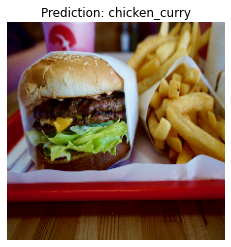

In [250]:
pred_and_plot(model_10, filename="/content/03-hamburger.jpeg", class_names=class_names)

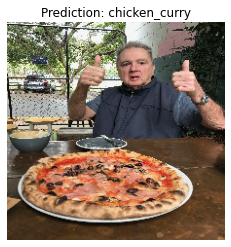

In [252]:
pred_and_plot(model_10, filename="/content/03-pizza-dad.jpeg", class_names=class_names)

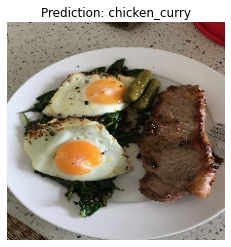

In [253]:
pred_and_plot(model_10, filename="/content/03-steak.jpeg", class_names=class_names)

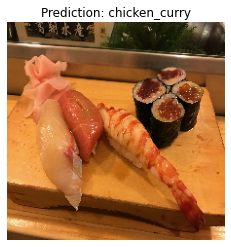

In [254]:
pred_and_plot(model_10, filename="/content/03-sushi.jpeg", class_names=class_names)

> The model didn't perform very well on the custom images but this is because it only achieved around *~42%* accuracy when evaluated on the test_data. So this type of poor performance was expected from the model.

## Saving and Loading the model

### Save the model

In [255]:
model_10.save("augmented_saved_model")

INFO:tensorflow:Assets written to: augmented_saved_model/assets


INFO:tensorflow:Assets written to: augmented_saved_model/assets


### Load the model

In [257]:
loaded_model=tf.keras.models.load_model('augmented_saved_model')
loaded_model.evaluate(test_data)

79/79 [==============================] - 11s 135ms/step - loss: 1.6788 - accuracy: 0.4320


[1.6788305044174194, 0.4320000112056732]

In [258]:
model_10.evaluate(test_data)

79/79 [==============================] - 11s 136ms/step - loss: 1.6788 - accuracy: 0.4320


[1.678830862045288, 0.4320000112056732]